<h1><center><u>Performing Clustering on Breast Cancer Dataset</u></center></h1>

<font size='3.5'>Building k-means models by loading breast cancer (built-in) data using sklearn library.</font>


#### Importing the basic packages

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
%matplotlib inline

#### Importing dataset

In [2]:
ds = load_breast_cancer()

In [3]:
data = pd.DataFrame(data = ds.data, columns = ds.feature_names)

In [4]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',100)

In [5]:
# Printing the first five columns of the dataset
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Checking the null values
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [7]:
# Printing the shape of the data
data.shape

(569, 30)

#### Data visualisation

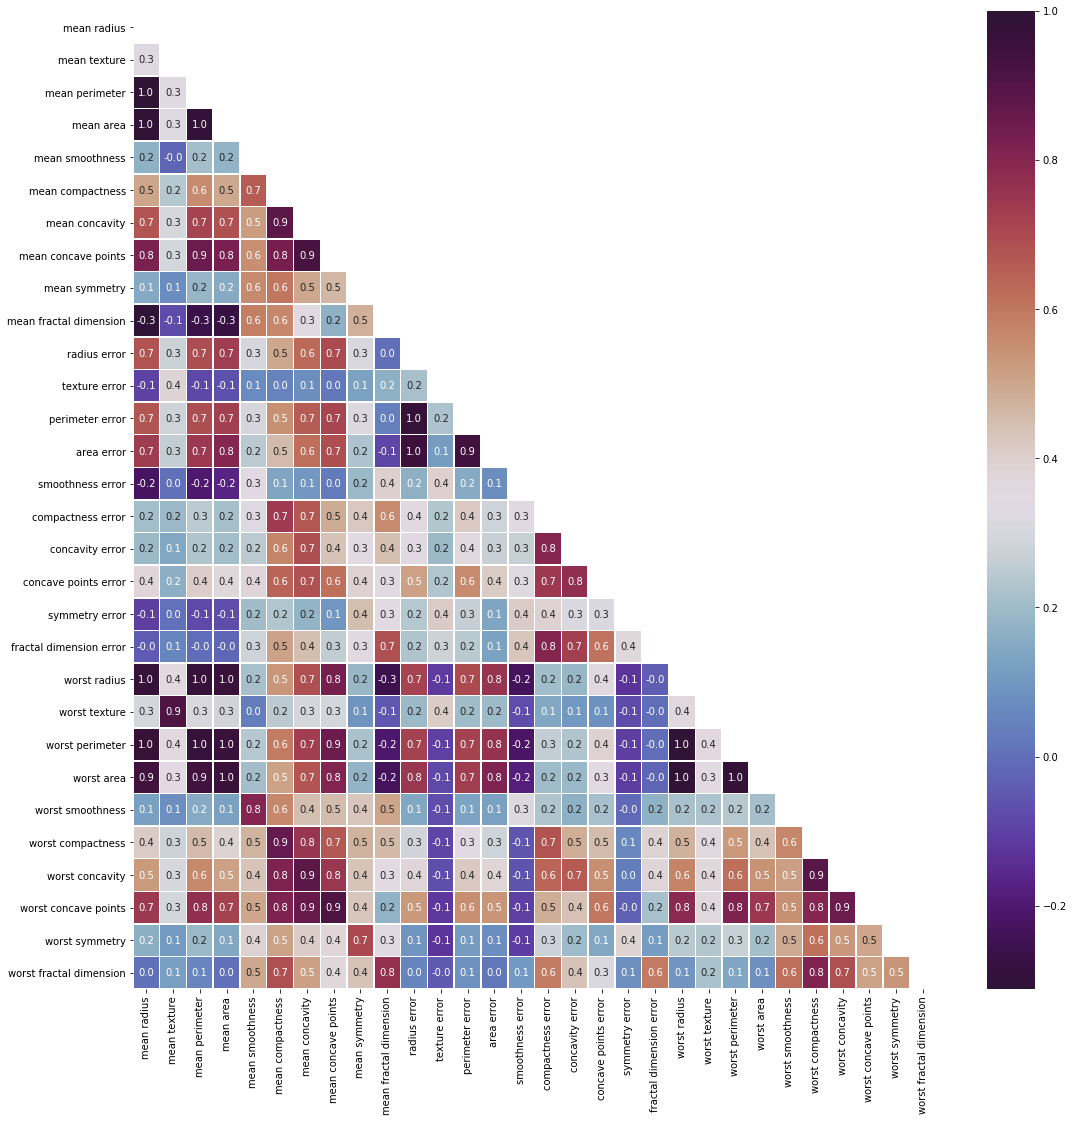

In [11]:
# Heat Map
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix,cmap='twilight_shifted')

[Text(0.5, 1.0, 'mean concavity vs concavity error')]

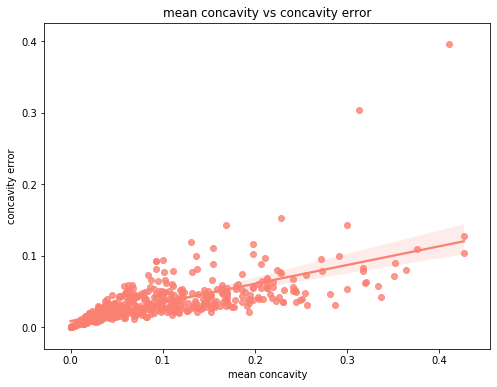

In [17]:
# Scatter plot
fig, ax = plt.subplots(figsize = (8, 6))
sns.regplot(data= data, x='mean concavity', y = 'concavity error',color='salmon').set(title = 'mean concavity vs concavity error')

[Text(0.5, 1.0, 'mean perimeter vs perimeter error')]

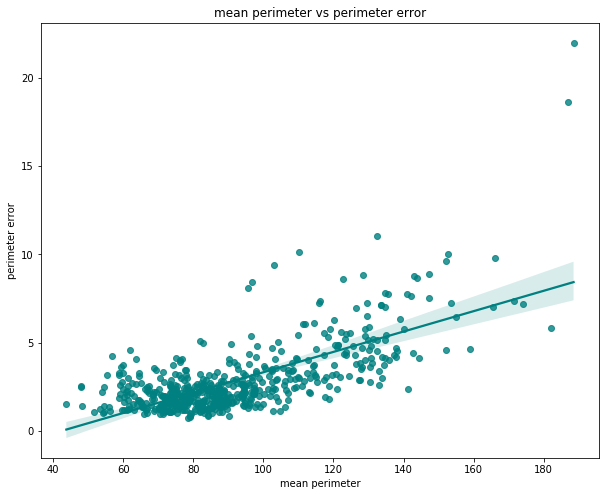

In [14]:
#Regression plot
fig, ax = plt.subplots(figsize = (10, 8))
sns.regplot(data= data, x='mean perimeter', y = 'perimeter error',color='teal').set(title = 'mean perimeter vs perimeter error')

#### Using elbow method to find the optimal number of clusters

In [18]:
x= ds.data

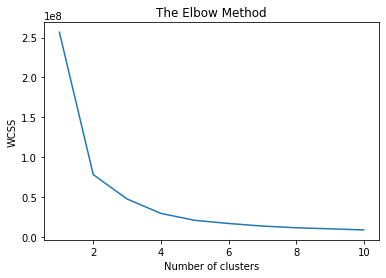

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
km = KMeans(n_clusters = 4, random_state = 0)
y_kmeans = km.fit_predict(x)

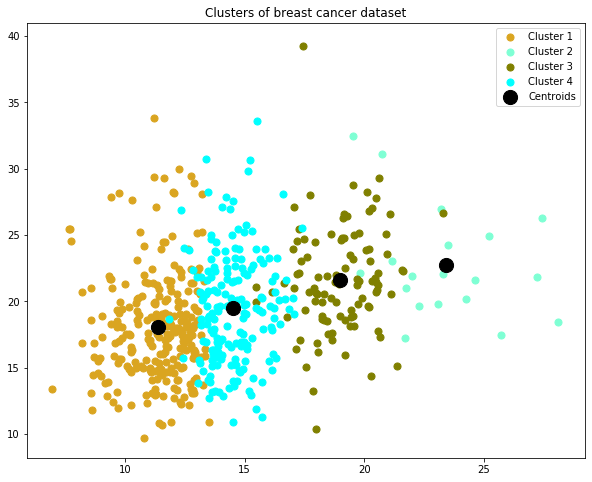

In [28]:
fig, ax = plt.subplots(figsize = (10, 8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'goldenrod', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'aquamarine', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'olive', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('Clusters of breast cancer dataset')
plt.legend()
plt.show()